In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

---

In [5]:
perf_dict = {
'Temporal IMU Encoder | 10NN': [55.56, 57.07, 57.14, 55.03, 56.37, 53.12, 50.78, 55.58, 54.31, 55.36],
'Temporal IMU Encoder | 1NN': [51.58, 56.38, 56.21, 57.49, 48.66, 47.22, 56.47, 54.15, 49.58, 50.04],
'SOTA': [39, 39.2, 42.2, 37.9, 37.1, 42.1, 39.2, 39.2, 39.6, 38.9],
}

In [6]:
perf_df = pd.DataFrame.from_records(perf_dict)
perf_df.head()

,SOTA,Temporal IMU Encoder | 10NN,Temporal IMU Encoder | 1NN
0,39.0,55.56,51.58
1,39.2,57.07,56.38
2,42.2,57.14,56.21
3,37.9,55.03,57.49
4,37.1,56.37,48.66


In [7]:
melt_df = pd.melt(perf_df, value_vars=['Temporal IMU Encoder | 1NN', 'Temporal IMU Encoder | 10NN', 'SOTA'])
melt_df.columns

Index(['variable', 'value'], dtype='object')

In [8]:
perf_df.mean(axis=0).to_dict()

{'SOTA': 39.440000000000005,
 'Temporal IMU Encoder | 10NN': 55.032,
 'Temporal IMU Encoder | 1NN': 52.778}

In [9]:
# plt.rcParams.keys()

In [10]:
# # sns.set(rc={'figure.figsize':(2,1)})
# # fig, ax = plt.subplots(figsize=(4, 2))
# # Set the figure border width
# # plt.rcParams['savefig.border_width'] = 2

# ax = sns.displot(data=melt_df, x="value", hue="variable", color='blue', kind="kde", legend=False, height=5, aspect=2.5)
# plt.tight_layout()
# plt.xlabel("Average Accuracy per Class", size=12)
# plt.ylabel("Probability", size=12)
# # plt.tick_params(left = False, labelleft = False)
# plt.axvline(x=perf_df['SOTA'].mean(),color='green')
# plt.axvline(x=perf_df['Temporal IMU Encoder | 10NN'].mean(),color='orange')
# plt.axvline(x=perf_df['Temporal IMU Encoder | 1NN'].mean(),color='blue')
# rr = ax.legend(labels = ['SOTA','TEZARNet - 10NN', 'TEZARNet -1NN'], loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3)
# plt.savefig('perf_dist1.png', format='png', dpi=300, bbox_extra_artists=(rr), bbox_inches='tight')

c:\Users\deela\anaconda3\envs\ml_base\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


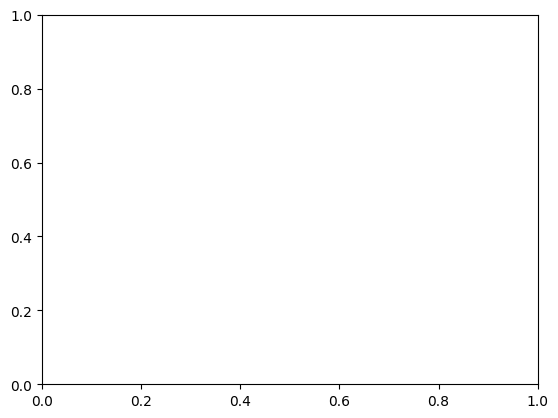

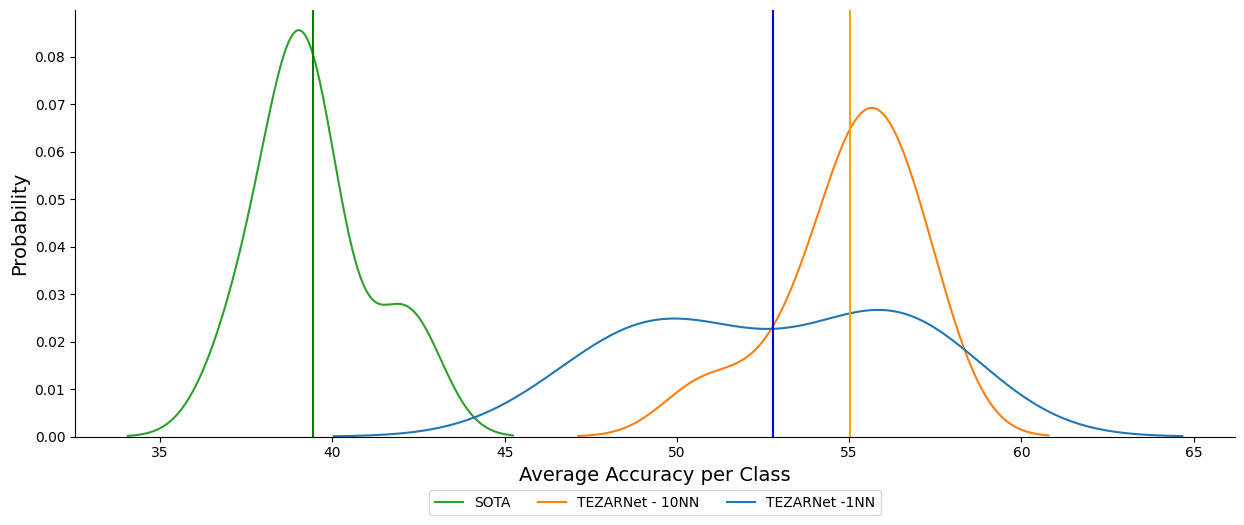

In [11]:
f, ax = plt.subplots()
sns_plot = sns.displot(data=melt_df, x="value", hue="variable", color='blue', kind="kde", legend=False, height=5, aspect=2.5, ax=ax)
# plt.tight_layout()
plt.xlabel("Average Accuracy per Class", size=14)
plt.ylabel("Probability", size=14)
# plt.tick_params(left = False, labelleft = False)
plt.axvline(x=perf_df['SOTA'].mean(),color='green')
plt.axvline(x=perf_df['Temporal IMU Encoder | 10NN'].mean(),color='orange')
plt.axvline(x=perf_df['Temporal IMU Encoder | 1NN'].mean(),color='blue')
plt.legend(labels = ['SOTA','TEZARNet - 10NN', 'TEZARNet -1NN'], loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=3)
sns_plot.figure.savefig('perf_dist.png', format='png', dpi=800, bbox_inches='tight')

In [1]:
from scipy.stats import ttest_ind

In [12]:
perf_dict.keys()

dict_keys(['Temporal IMU Encoder | 10NN', 'Temporal IMU Encoder | 1NN', 'SOTA'])

In [13]:
for k in perf_dict.keys():
    arr = np.array(perf_dict[k])
    print(f"{k} >>> mean: {arr.mean()} | max: {arr.max()} | std. err: {np.std(arr, ddof=1) / np.sqrt(len(arr))} | p-value: {ttest_ind(arr[:5], arr[5:])[1]}")

Temporal IMU Encoder | 10NN >>> mean: 55.032 | max: 57.14 | std. err: 0.6085553019698009 | p-value: 0.03846303861250937
Temporal IMU Encoder | 1NN >>> mean: 52.778 | max: 57.49 | std. err: 1.1994330142011085 | p-value: 0.3106441359117132
SOTA >>> mean: 39.440000000000005 | max: 42.2 | std. err: 0.5079807520412999 | p-value: 0.5111324249110412


In [14]:
ttest_ind(perf_df['SOTA'].values, perf_df['Temporal IMU Encoder | 10NN'].values)[1]

1.2842250410850611e-13

In [15]:
ttest_ind(perf_df['SOTA'].values, perf_df['Temporal IMU Encoder | 1NN'].values)[1]

6.194444902795977e-09

In [2]:
a= [71.28, 75.19, 71.17, 69.56, 72.37, 70.89, 71.17, 73.02, 69.99, 70.45]
b=[78.28, 76.21, 76.64, 76.17, 77.79, 77.9, 77.07, 77.73, 77.27, 77.78]

In [3]:
ttest_ind(a,b)[1]

7.602349378781603e-09

In [1]:
def perc_imp(old, new):
    imp = (new-old)/old*100
    return imp 

In [6]:
perfs = [(54.93, 57.49), (70.6, 76.1), (32.4, 33.6), (38.8, 42.4)]
for o,n in perfs:
    print(perc_imp(o,n))

4.660476970689973
7.790368271954675
3.7037037037037126
9.278350515463922


---

In [9]:
knn_df = pd.read_csv('../tmp/knn.csv')
knn_df.head()

,neighs,neigh weights,perf
0,1,uniform,50.79
1,1,uniform,54.33
2,1,uniform,51.01
3,1,inv. dist.,51.71
4,1,inv. dist.,50.04


In [10]:
knn_df.columns

Index(['neighs', 'neigh weights', 'perf'], dtype='object')

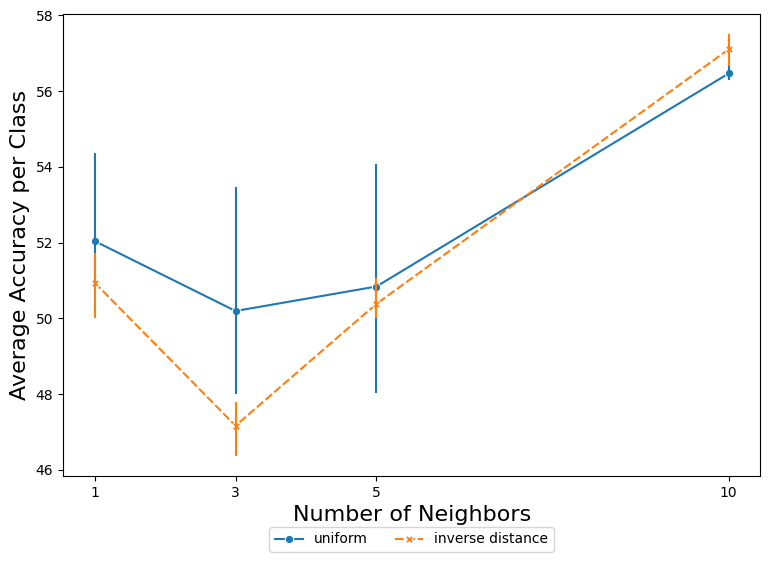

In [13]:
plt.figure(figsize=(9,6))
sns_plot2 = sns.lineplot(x ='neighs', y ='perf', hue='neigh weights', style='neigh weights', data=knn_df, errorbar=('ci', 95), err_style='bars', markers=True, marker='o')
plt.xticks([1,3,5,10])
plt.xlabel("Number of Neighbors", size=16)
plt.ylabel("Average Accuracy per Class", size=16)
plt.legend(labels = ['uniform','inverse distance'], loc="lower center", bbox_to_anchor=(0.5, -0.18), ncol=2)
sns_plot2.figure.savefig('perf_knn.png', format='png', dpi=800,  bbox_inches='tight')

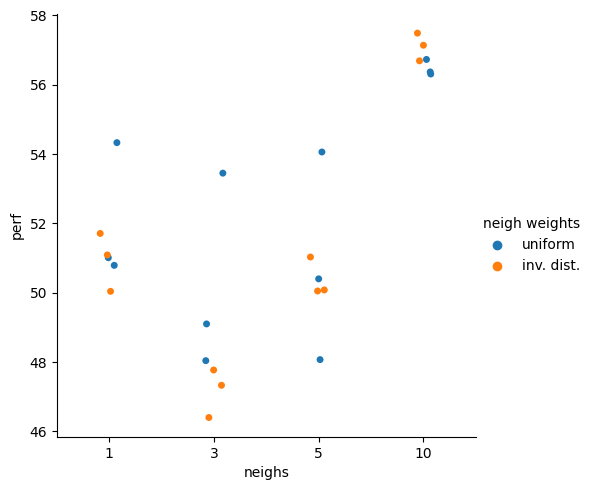

In [42]:
sns.catplot(data=knn_df, x ='neighs', y ='perf', hue='neigh weights')

---

In [6]:
dist_df = pd.read_csv('../tmp/dist.csv')
dist_df.head()

,distance,weighting,perf
0,cosine,uniform,56.37
1,cosine,uniform,56.31
2,cosine,uniform,56.73
3,cosine,inverse distance,57.49
4,cosine,inverse distance,57.14


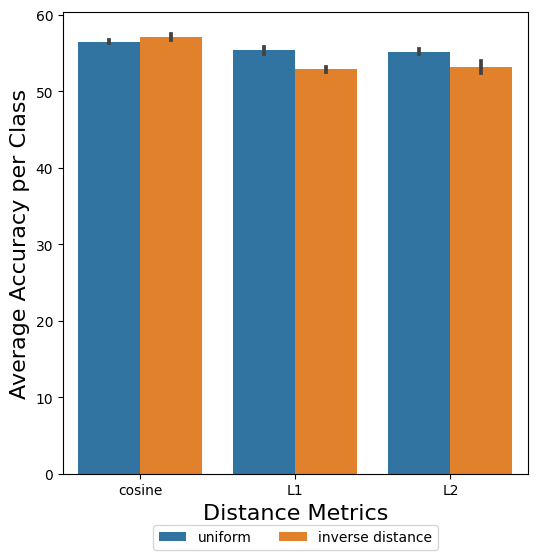

In [8]:
plt.figure(figsize=(6,6))
sns_plot2 = sns.barplot(data=dist_df, x="distance", y="perf", errorbar="sd", hue='weighting')
plt.xlabel("Distance Metrics", size=16)
plt.ylabel("Average Accuracy per Class", size=16)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.18), ncol=2)
sns_plot2.figure.savefig('dist_met.png', format='png', dpi=800,  bbox_inches='tight')

---

In [46]:
rnn_df = pd.read_csv('../tmp/temporal.csv')
rnn_df.head()

,temporal model,house cleaning,standing,ascending stairs,watching TV,walking,sitting,descending stairs,rope jumping,computer work,...,vacuum cleaning,playing soccer,Nordic walking,cycling,running,ironing,folding laudry,car driving,Unnamed: 19,\n
0,LSTM,0.681,0.551,0.821,0.269,0.710,0.937,0.458,0.236,0.845,...,0.516,0.143,0.221,0.861,0.366,0.897,0.265,0.312,NaN,NaN
1,BiLSTM,0.746,0.535,0.843,0.324,0.737,0.970,0.738,0.369,0.526,...,0.674,0.738,0.282,0.892,0.371,0.911,0.311,0.252,NaN,NaN
2,Transformer Encoder,0.802,0.600,0.869,0.121,0.727,0.916,0.554,0.215,0.845,...,0.364,0.446,0.186,0.886,0.346,0.891,0.249,0.212,NaN,NaN
3,Attention LSTM,0.711,0.552,0.812,0.062,0.727,0.958,0.664,0.289,0.617,...,0.429,0.638,0.104,0.969,0.181,0.910,0.253,0.221,NaN,NaN


In [2]:
melt_df = pd.read_csv('../tmp/melt_df1.csv')
melt_df['value'] = melt_df['value']*100
melt_df.head()

,class,value,model
0,house cleaning,68.1,LSTM
1,house cleaning,71.1,Attention LSTM
2,house cleaning,80.2,Transformer Encoder
3,house cleaning,84.6,BiLSTM
4,standing,55.1,LSTM


In [3]:
x = list(melt_df['class'].unique())

In [4]:
x

['house cleaning',
 'standing',
 'ascending stairs',
 'walking',
 'sitting',
 'cycling']

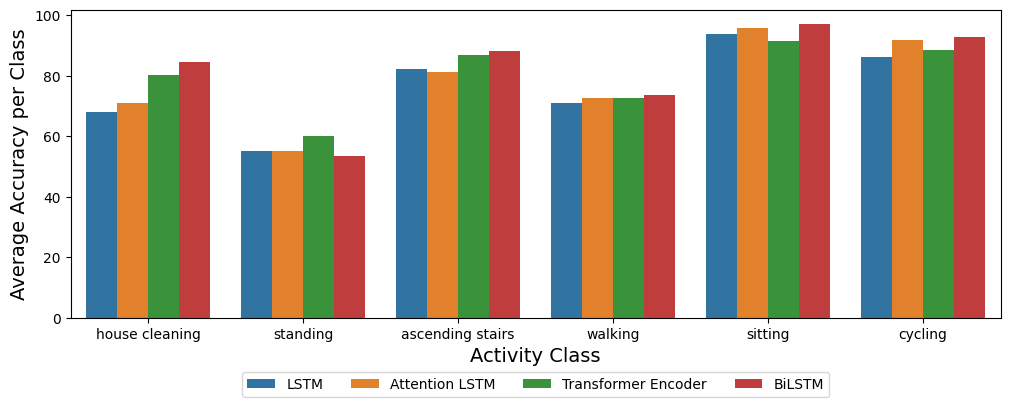

In [5]:
plt.figure(figsize=(12,4)) 
sns_plot3 = sns.barplot(data=melt_df, x="class", y="value", hue="model")
plt.xticks(rotation=0, ha='center')
plt.xlabel("Activity Class", size=14)
# plt.xlim(x[0], x[-1])
plt.ylabel("Average Accuracy per Class", size=14)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.28), ncol=4)
sns_plot3.figure.savefig('rnn.png', format='png', dpi=800, bbox_inches='tight')